# Start of DeepAR

In [1]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.common import ListDataset
from itertools import islice
from gluonts.evaluation.backtest import make_evaluation_predictions

from gluonts.evaluation import Evaluator
from gluonts.model.seasonal_naive import SeasonalNaivePredictor

In [2]:
RMSE_DICT = {}

In [3]:
def get_data(df, training_date, testing_date):
    training_data = ListDataset(
        [{"start": df.index[0], "target": df[:training_date]}],
        freq = "1d"
    )

    test_data = ListDataset(
        [{"start": df.index[0], "target": df[:testing_date]}],
        freq = "1d"
    )
    
    return training_data, test_data

def plot_sample(df):
    df[:200].plot(figsize=(20, 5), linewidth=2)
    plt.grid()
    plt.legend(["Open Issues"])
    plt.show()
    
def model_deepAR(test_data, training_data, freq = "1d", prediction_length = 15, epochs = 10, sample_len=365, dropout_rate=0.3):
    estimator = DeepAREstimator(freq = "1d", prediction_length = prediction_length, trainer = Trainer(epochs=10), num_layers=5, cell_type='lstm', dropout_rate=dropout_rate)
    predictor = estimator.train(training_data=training_data)
    forecast_it, ts_it = make_evaluation_predictions(test_data, predictor=predictor, num_samples=sample_len)
    return list(forecast_it), list(ts_it)

def plot_forecasts(tss, forecasts, past_length, num_plots):
    for target, forecast in islice(zip(tss, forecasts), num_plots):
        ax = target[-past_length:].plot(figsize=(12, 5), linewidth=2)
        forecast.plot(color='g')
        plt.grid(which='both')
        plt.legend(["observations", "median prediction", "90% confidence interval", "50% confidence interval"])
        plt.show()
        
def find_RMSE(tss, forecasts, test_data, exp_no):
    evaluator = Evaluator(quantiles=[0.5])
    agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_data))
    print("The RMSE values for Experiment", exp_no, ":" , agg_metrics['RMSE'])
    RMSE_DICT[exp_no] = round(agg_metrics['RMSE'],2)

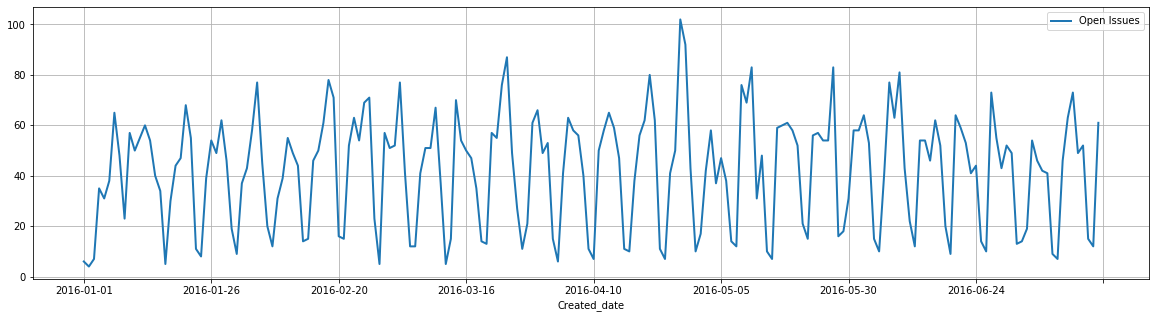

In [4]:
df_data = pd.read_csv("final_timeseries_df.csv", header=0, index_col=0)
df = df_data.Open
plot_sample(df)

In [5]:
short_input_list = [ 90, 360, 360*2, 360*4 ]
short_output_list = [ 15, 30, 60, 90 ]
experiment_number_list = [ "2."+str(x+1) for x in range(len(short_input_list)* len(short_output_list))]

  0%|          | 0/50 [00:00<?, ?it/s]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.1 Input Length: 90 Output Length: 15
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:05<00:00,  8.52it/s, epoch=10/10, avg_epoch_loss=2.76]


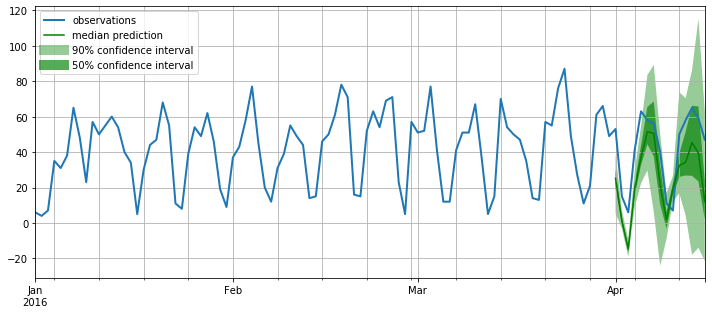

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.1 : 19.264301539429955
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.2 Input Length: 90 Output Length: 30
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:08<00:00,  5.86it/s, epoch=10/10, avg_epoch_loss=2.62]


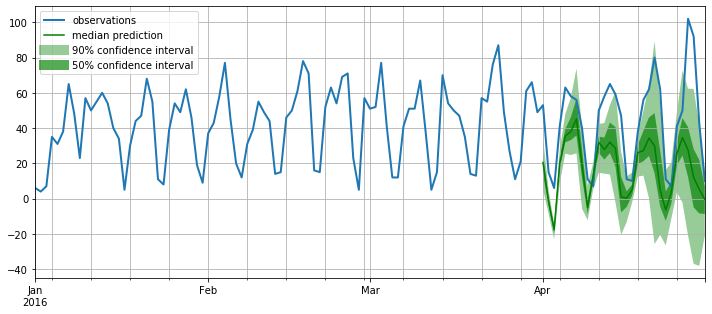

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.2 : 32.260138506496425
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.3 Input Length: 90 Output Length: 60
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:17<00:00,  2.80it/s, epoch=10/10, avg_epoch_loss=2.65]


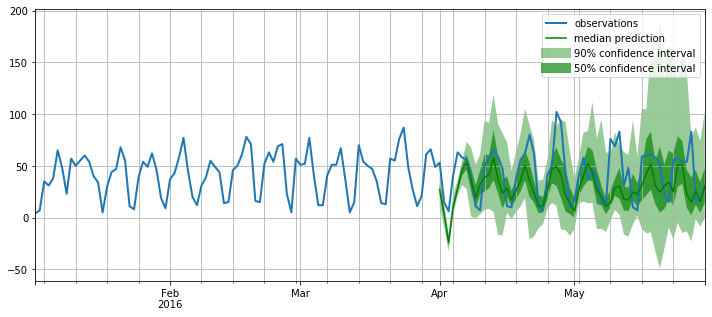

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.3 : 23.6063749334793
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.4 Input Length: 90 Output Length: 90
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:33<00:00,  1.50it/s, epoch=10/10, avg_epoch_loss=1.64]


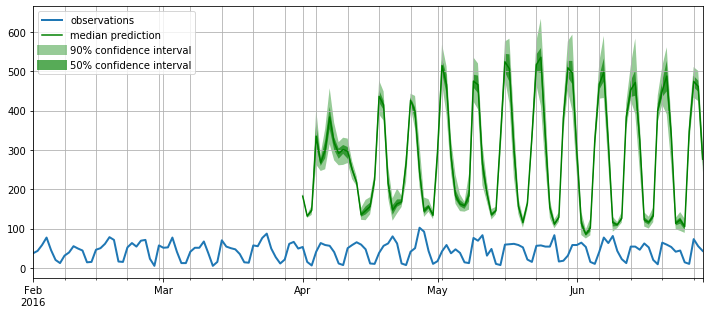

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.4 : 271.1553060517164
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.5 Input Length: 360 Output Length: 15
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:06<00:00,  8.33it/s, epoch=10/10, avg_epoch_loss=3.46]


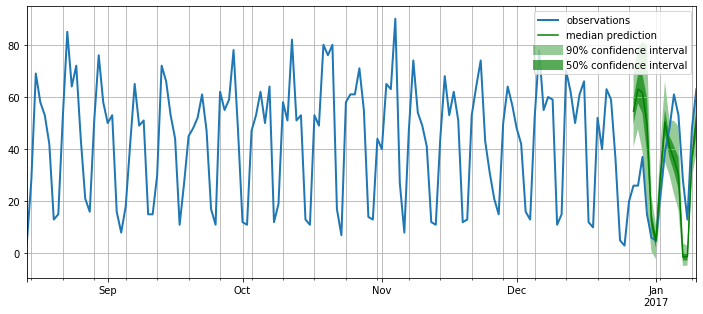

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.5 : 20.933313480699848
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.6 Input Length: 360 Output Length: 30
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:08<00:00,  6.14it/s, epoch=10/10, avg_epoch_loss=3.45]


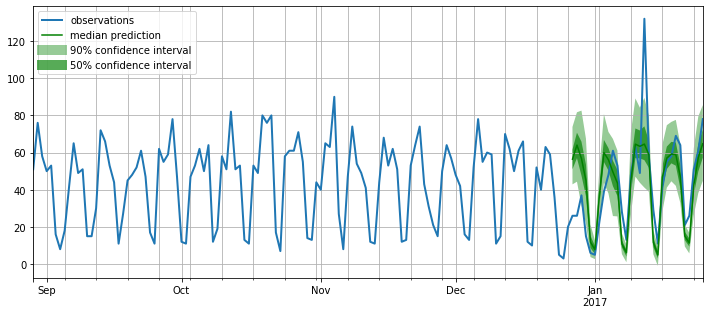

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.6 : 19.21000139629962
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.7 Input Length: 360 Output Length: 60
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:20<00:00,  2.42it/s, epoch=10/10, avg_epoch_loss=3.42]


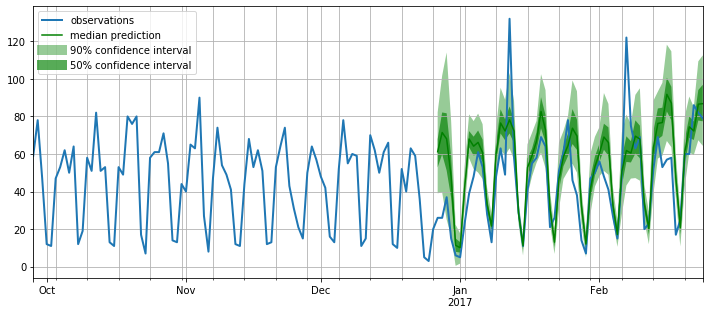

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.7 : 19.782710418706955
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.8 Input Length: 360 Output Length: 90
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:25<00:00,  1.97it/s, epoch=10/10, avg_epoch_loss=3.33]


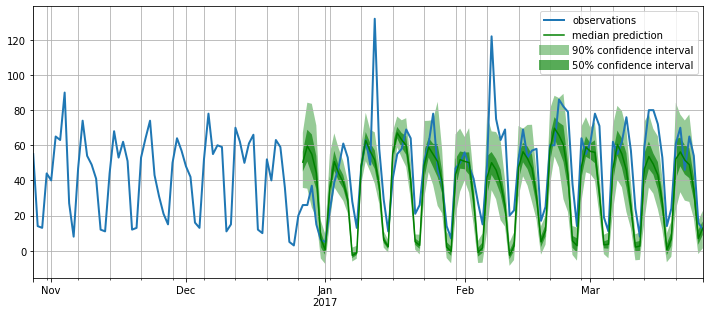

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.8 : 21.246836978647487
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.9 Input Length: 720 Output Length: 15
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:05<00:00,  9.62it/s, epoch=10/10, avg_epoch_loss=3.62]


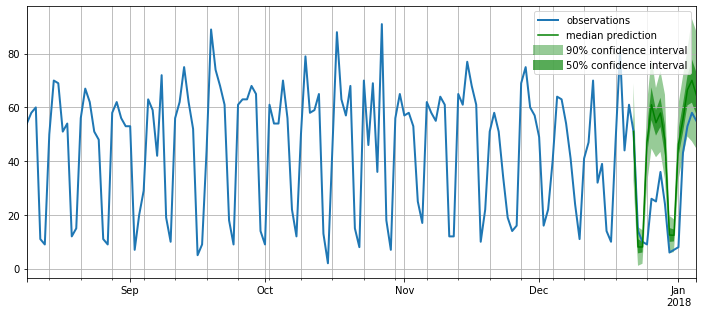

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.9 : 21.30767143493551
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.10 Input Length: 720 Output Length: 30
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:08<00:00,  6.22it/s, epoch=10/10, avg_epoch_loss=3.57]


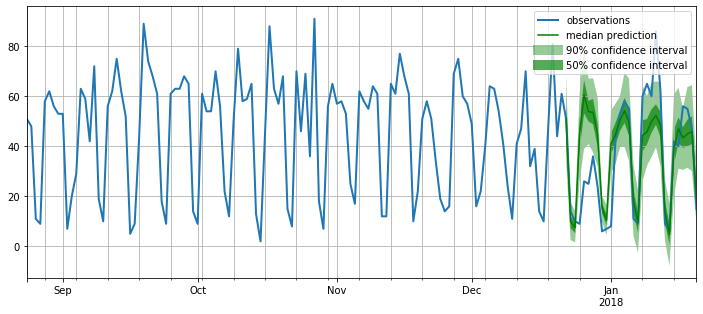

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.10 : 16.01079754480811
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.11 Input Length: 720 Output Length: 60
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:15<00:00,  3.15it/s, epoch=10/10, avg_epoch_loss=3.5] 


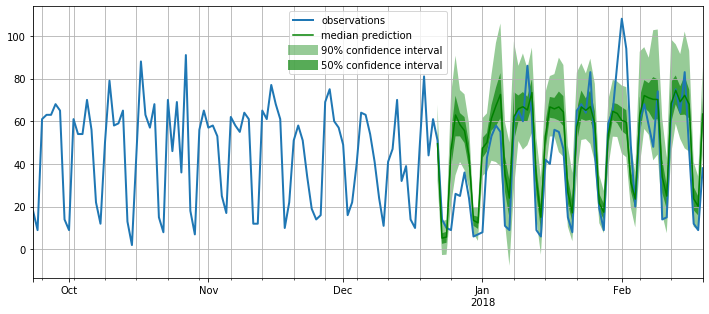

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.11 : 17.493258560144916
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.12 Input Length: 720 Output Length: 90
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:27<00:00,  1.82it/s, epoch=10/10, avg_epoch_loss=3.5]


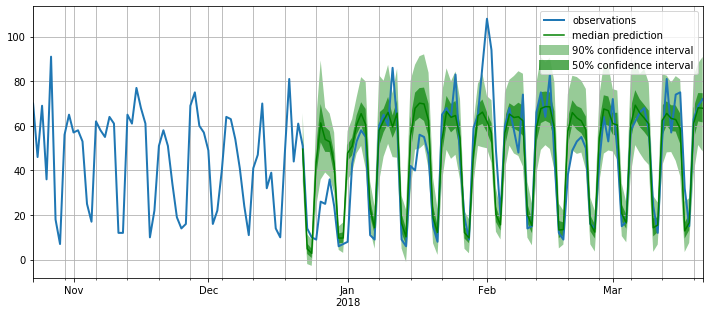

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.12 : 14.090707050166472
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.13 Input Length: 1440 Output Length: 15
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:05<00:00,  9.34it/s, epoch=10/10, avg_epoch_loss=3.69]


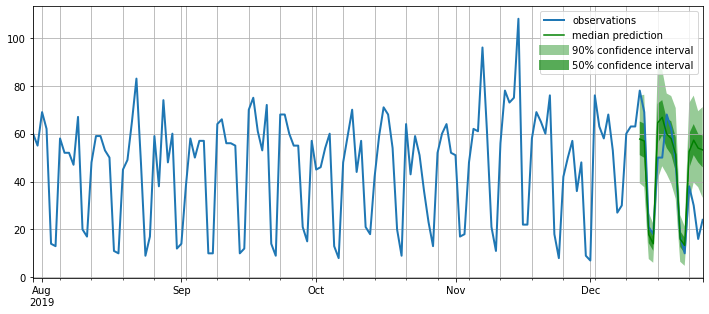

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.13 : 17.08971235068533
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.14 Input Length: 1440 Output Length: 30
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:07<00:00,  6.39it/s, epoch=10/10, avg_epoch_loss=3.69]


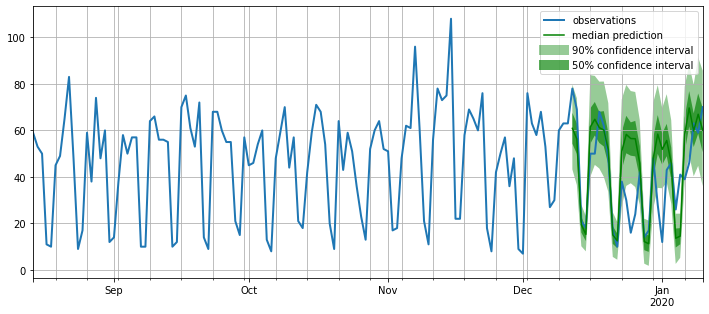

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.14 : 17.519538943467282
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.15 Input Length: 1440 Output Length: 60
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:18<00:00,  2.67it/s, epoch=10/10, avg_epoch_loss=3.65]


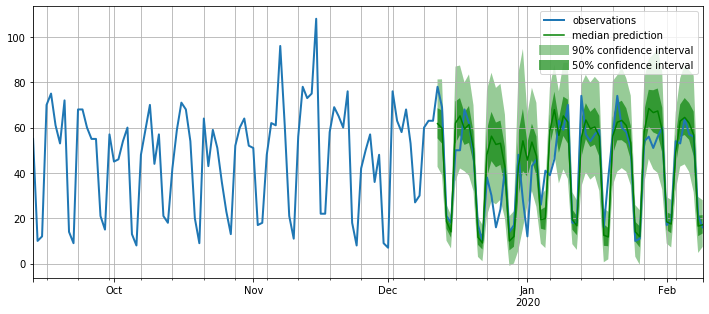

  0%|          | 0/50 [00:00<?, ?it/s]

The RMSE values for Experiment 2.15 : 12.51053722534195
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Experiment: 2.16 Input Length: 1440 Output Length: 90
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:25<00:00,  1.96it/s, epoch=10/10, avg_epoch_loss=3.64]


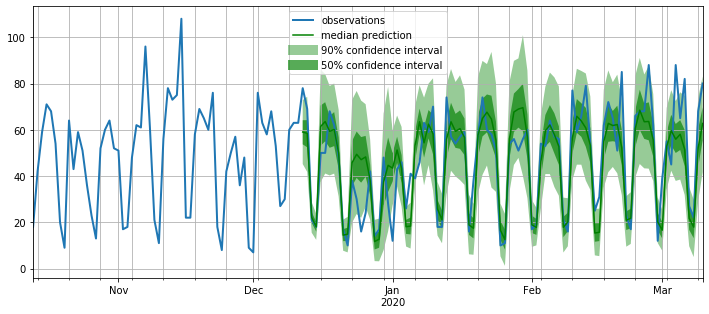

Running evaluation: 100%|██████████| 1/1 [00:00<00:00, 12.56it/s]


The RMSE values for Experiment 2.16 : 12.571966875889876


In [6]:
cnt = 0
for training_index in short_input_list:
    for testing_index in short_output_list:
        exp_no = experiment_number_list[cnt]
        cnt += 1
        training_date1 = df.index[training_index]
        testing_date1 = df.index[training_index + testing_index]
        repeat = 150
        print("X" * repeat)
        print("Experiment:",exp_no,"Input Length:", training_index, "Output Length:", testing_index)
        print("X" * repeat)
        pred_len1 = testing_index
        freq1 = "1d"
        sample_len1 = training_index
        dropout_rate1 = 0.3
        training_data1, test_data1 = get_data(df, training_date1, testing_date1)
        forecasts1, tss1 = model_deepAR(test_data1, training_data1, freq1, pred_len1, 10, sample_len1, dropout_rate1)
        plot_forecasts(tss1, forecasts1, past_length=150, num_plots=1)
        rmse = find_RMSE(tss1, forecasts1, test_data1, exp_no)

In [8]:
result = pd.DataFrame([RMSE_DICT.keys(), RMSE_DICT.values()]).T
result.columns = ["Experiement", "RMSE"]
result

,Experiement,RMSE
0,2.1,19.26
1,2.2,32.26
2,2.3,23.61
3,2.4,271.16
4,2.5,20.93
5,2.6,19.21
6,2.7,19.78
7,2.8,21.25
8,2.9,21.31
9,2.10,16.01


# End of DeepAR